## 1 ere question

In [1]:
from sklearn.datasets.mldata import fetch_mldata
dataset_name ='leukemia'
data = fetch_mldata(dataset_name)
X = data.data
Y = data.target
X = X.astype(float)
Y = Y.astype(float)



## 1 ere question

In [2]:
import pandas as pd
import urllib
import zipfile
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # for plots
from matplotlib import rc
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from math import cos, sin, pi, sqrt
from statsmodels.nonparametric.kde import KDEUnivariate
from scipy.linalg import toeplitz
from numpy.linalg import eigh
from sklearn import linear_model
from sklearn import preprocessing as pr
from sklearn.decomposition import PCA
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import model_selection as ms
from os import mkdir, path
from functools import partial 
#from functions_Lasso import LSLassoCV, PredictionError, \
#    ScenarioEquiCor, ridge_path, refitting, my_nonzeros
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, Lasso, \
    lasso_path
from matplotlib.patches import Polygon, Circle
#from prox_collection import l22_objective, l1_objective, l0_objective, \
#    scad_objective, mcp_objective, log_objective, sqrt_objective, \
#    enet_objective, l22_pen, l1_pen, l0_pen, scad_pen,\
#    mcp_pen, log_pen, sqrt_pen, enet_pen



In [3]:
# Nombres de variables explicatives
print("le nombre de variables explicatives est: ", X.shape[1])

# pretraitement et mise sous forme de dataframe sur la vraiance exclusivement
scaler = pr.StandardScaler(with_mean=False, with_std=True).fit(X)
x_scaled = scaler.transform(X)
dF = pd.DataFrame(x_scaled)

Test = list(map(lambda x: x.var() == 1, dF.columns))
print("On verifie: ", Test[Test == False])

le nombre de variables explicatives est:  7129
On verifie:  False


## 2 eme question

[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.]


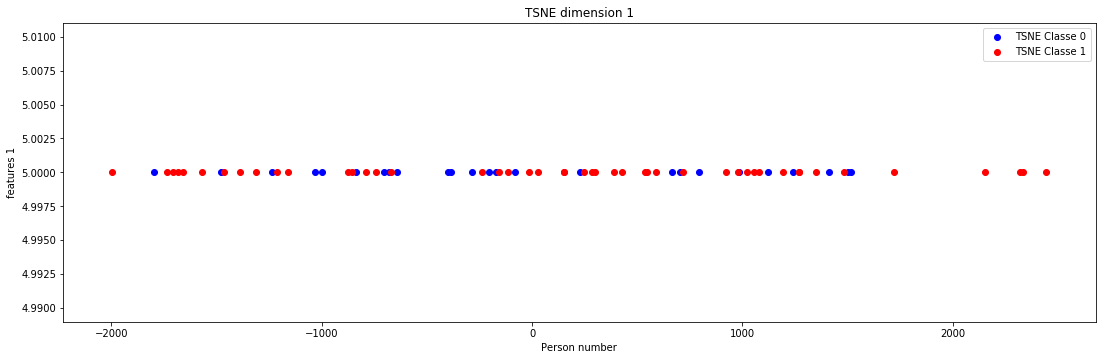

In [4]:
fig = plt.figure(figsize=(18.5, 5.5))

# On applique une ACP

# En dimension 1
pca = PCA(n_components=1)
Res_1 = pca.fit_transform(x_scaled, 1)
tsne_1 = manifold.TSNE(init='pca',n_components=1, random_state=0)
X_tsne_1 = tsne_1.fit_transform(x_scaled)
# En dimension 2
pca_2 = PCA(n_components=2)
Res_2 = pca_2.fit_transform(x_scaled, 2)
tsne_2 = manifold.TSNE(init='pca',n_components=2, random_state=0)
X_tsne_2 = tsne_2.fit_transform(x_scaled)

IndexesClass0 = np.where(Y==-1)
IndexesClass1 = np.where(Y== 1)
y_grid = np.zeros(72)
y_grid =y_grid +5

print(y_grid[IndexesClass0])


plt.scatter( X_tsne_1[IndexesClass0], y_grid[IndexesClass0], color='blue', label ='TSNE Classe 0')
plt.scatter( X_tsne_1[IndexesClass1],y_grid[IndexesClass1], color='red', label ='TSNE Classe 1')
plt.title('TSNE dimension 1')
plt.xlabel('Person number')
plt.ylabel('features 1')
plt.legend()
plt.show()


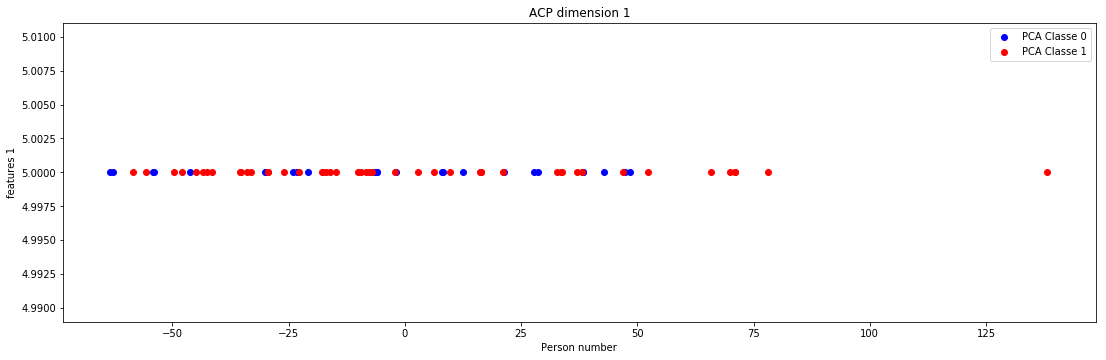

In [5]:
fig = plt.figure(figsize=(18.5, 5.5))

plt.scatter(Res_1[IndexesClass0], y_grid[IndexesClass0], color='blue', label ='PCA Classe 0')
plt.scatter(Res_1[IndexesClass1],y_grid[IndexesClass1], color='red', label ='PCA Classe 1')
plt.title('ACP dimension 1')
plt.xlabel('Person number')
plt.ylabel('features 1')
plt.legend()
plt.show()

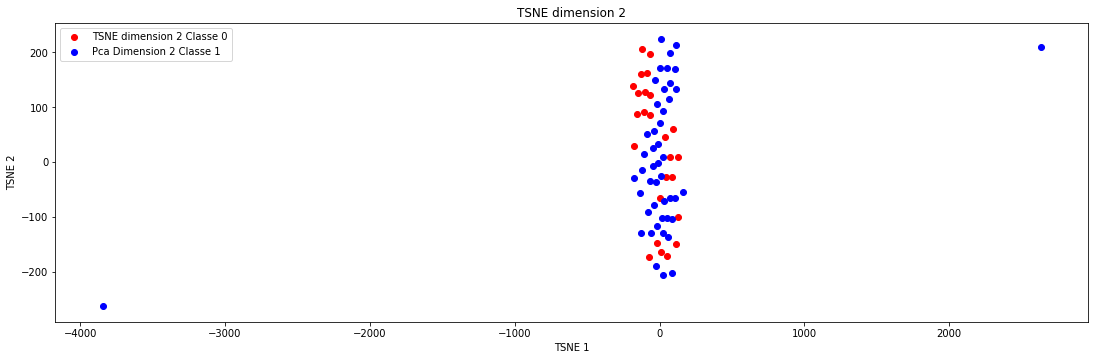

In [6]:
plt.figure(figsize=(18.5,5.5))
plt.scatter(X_tsne_2[IndexesClass0,0], X_tsne_2[IndexesClass0,1], color='red', label ='TSNE dimension 2 Classe 0')
plt.scatter(X_tsne_2[IndexesClass1,0],X_tsne_2[IndexesClass1,1], color='blue', label ='TSNE 2 Classe 1')
plt.title("TSNE dimension 2")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.legend()
plt.show()

## 3 eme question

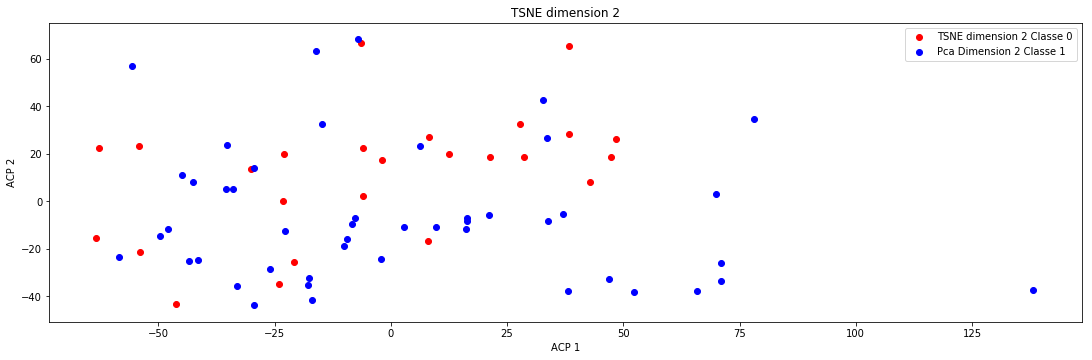

In [7]:
plt.figure(figsize=(18.5,5.5))
plt.scatter(Res_2[IndexesClass0,0], Res_2[IndexesClass0,1], color='red', label ='TSNE dimension 2 Classe 0')
plt.scatter(Res_2[IndexesClass1,0],Res_2[IndexesClass1,1], color='blue', label ='Pca Dimension 2 Classe 1')
plt.title("TSNE dimension 2")
plt.xlabel("ACP 1")
plt.ylabel("ACP 2")
plt.legend()
plt.show()

## 3 eme question

In [8]:
# on split nos données
ModelData = ms.train_test_split(x_scaled, Y, test_size=0.2)
Xtrain = ModelData[0]
Xtest = ModelData[1]
Ytrain = ModelData[2]
Ytest = ModelData[3]


## 4 eme question

$\eta-{\lambda(z)} = sign(z)(\mid z \mid - n\lambda) $

$\lambda' = \lambda /n $

## 5 eme question

In [9]:
# On prend CV =0
#CV = 0
alpha = np.zeros(17)
Lambda0 = np.max(max(abs(np.dot(Xtrain.T,Ytrain))))/Xtrain.shape[0]

for i in range(0,17):
    alpha[i] = Lambda0*10**(-2*i/16)
print(alpha)

clf = linear_model.LassoCV(alphas=alpha,fit_intercept=False,cv=4)
clf = clf.fit(Xtrain, Ytrain)
Ypred = clf.predict(Xtest)
risque = sum(Ypred-Ytest)**2/ len(Ypred)
print("le risque est :", risque)




[ 0.76577513  0.57425034  0.430627    0.3229247   0.24215936  0.1815939
  0.13617621  0.10211776  0.07657751  0.05742503  0.0430627   0.03229247
  0.02421594  0.01815939  0.01361762  0.01021178  0.00765775]
le risque est : 3.35451565717


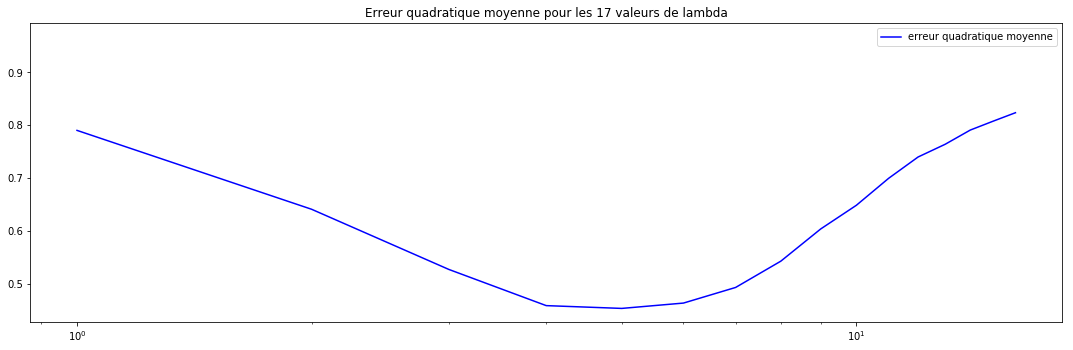

In [10]:
plt.figure(figsize=(18.5, 5.5))
plt.semilogx(clf.mse_path_.mean(axis=1), label= 'erreur quadratique moyenne', color='blue')
plt.title('Erreur quadratique moyenne pour les 17 valeurs de lambda')
plt.legend()
plt.show()

## 6 eme question

In [11]:
# un estimateur de la variance du bruit peut s'obtenir de la maniere suivante
# On calcule le bruit pour nos echantillons (Y-Ychap) puis on prend
# l'ecart type du vecteur considéré

VecteurBruit = (Ytest - Ypred)
np.std(VecteurBruit)
print("l'ecart type est: ", np.std(VecteurBruit))

l'ecart type est:  0.380474697393


## 7 eme question

In [12]:
def LassoSeuille(X, Y, Lambda, Tho, intercept):
    
    theta_lasso_seuille=(0,0)
    lasso_cv = linear_model.Lasso(alpha=Lambda,fit_intercept=False).fit(X, Y)
    s = []
    coef_seuil = []
    for j in range(X.shape[1]):
        if abs(lasso_cv.coef_[j]) > Tho:
            s.append(j)
    if len(s)>0:     
        new_X = X[:,s]
        theta_lasso_seuille =  linear_model.LinearRegression(fit_intercept=intercept).fit(new_X, Y)
    else:
        print(Lambda)
        print(Tho)
        print('Tho est trop grand aucune features retenues')
    return (theta_lasso_seuille,s)
#print(LassoSeuille(Xtrain, Ytrain, 0.6, 10**(-3))[1])
#print(LassoSeuille(Xtrain, Ytrain, 0.6, 10**(-3))[0].coef_)


## 8 eme question

In [13]:
from sklearn.model_selection import KFold
# Procédure de Cv pour le lasso

kf = KFold(4)
mylist = list(kf.split(x_scaled, Y))
train, test = mylist[0]
#print(train)


def computeCV(listeCV, res, Tho, Lambdas, X, Y, intercept):
    res = []
    modele=[]
    for i in range(0,len(Lambdas)):
        for j in range(0,len(Tho)):
            modele = LassoSeuille(X[listeCV[0]], Y[
                                  listeCV[0]], Lambdas[i], Tho[j], intercept)
            
            if len(modele[1]) > 0:
                Xi=np.take(X[listeCV[1]],modele[1], axis=1)
                res.append((np.linalg.norm(Y[listeCV[1]] - modele[0].predict(Xi)))/len(listeCV[0]))
    return res
res = []
Tho = np.linspace(10**(-4),10**(-3),5)
print(Tho)
#res = computeCV(mylist[0], res, Tho, alpha, x_scaled, Y)
for l in mylist:
    res.append(computeCV(l, res, Tho, alpha, x_scaled, Y, False))



[ 0.0001    0.000325  0.00055   0.000775  0.001   ]


/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.765775131451
0.0001
Tho est trop grand aucune features retenues
0.765775131451
0.000325
Tho est trop grand aucune features retenues
0.765775131451
0.00055
Tho est trop grand aucune features retenues
0.765775131451
0.000775
Tho est trop grand aucune features retenues
0.765775131451
0.001
Tho est trop grand aucune features retenues
0.765775131451
0.0001
Tho est trop grand aucune features retenues
0.765775131451
0.000325
Tho est trop grand aucune features retenues
0.765775131451
0.00055
Tho est trop grand aucune features retenues
0.765775131451
0.000775
Tho est trop grand aucune features retenues
0.765775131451
0.001
Tho est trop grand aucune features retenues


## 9 eme question

In [14]:
df = pd.DataFrame(res)
df = df.T
df = df.apply(lambda x: np.sort(x.values))
df.head()

0         1         2         3
0  0.048155  0.034402  0.039694  0.053667
1  0.048155  0.034402  0.039694  0.053667
2  0.048155  0.034402  0.039694  0.053667
3  0.048155  0.034402  0.039694  0.053667
4  0.048155  0.034402  0.039694  0.053667

In [15]:
thetalr =  linear_model.LinearRegression(fit_intercept=False).fit(Xtrain, Ytrain)
y_predlr = thetalr.predict(Xtest)
print("Erreur: ", np.mean(y_predlr - Ytest))




Erreur:  -1.46666674369


Erreur min Lasso Seuille: 0.034402 <br>
Erreur LassoCV: 4.73   --- (Question 5)<br>
Erreur estimation moindres carrées: 2.15

## 10 question


In [16]:
thetalr =  linear_model.LinearRegression(fit_intercept=True).fit(Xtrain, Ytrain)
y_predlr = thetalr.predict(Xtest)
print("Erreur: ", np.mean(y_predlr - Ytest))
res_1 = []
#res = computeCV(mylist[0], res, Tho, alpha, x_scaled, Y)
for l in mylist:
    res_1.append(computeCV(l, res, Tho, alpha, x_scaled, Y, True))

df = pd.DataFrame(res)
df = df.T
df = df.apply(lambda x: np.sort(x.values))
clf_1 = linear_model.LassoCV(alphas=alpha,fit_intercept=True,cv=4)
clf_1 = clf_1.fit(Xtrain, Ytrain)
Ypred = clf_1.predict(Xtest)
risque_1 = sum(Ypred-Ytest)/ len(Ypred)

print('risque LCV', risque_1 )

df.head()


Erreur:  -0.038877810903


/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.765775131451
0.0001
Tho est trop grand aucune features retenues
0.765775131451
0.000325
Tho est trop grand aucune features retenues
0.765775131451
0.00055
Tho est trop grand aucune features retenues
0.765775131451
0.000775
Tho est trop grand aucune features retenues
0.765775131451
0.001
Tho est trop grand aucune features retenues
0.765775131451
0.0001
Tho est trop grand aucune features retenues
0.765775131451
0.000325
Tho est trop grand aucune features retenues
0.765775131451
0.00055
Tho est trop grand aucune features retenues
0.765775131451
0.000775
Tho est trop grand aucune features retenues
0.765775131451
0.001
Tho est trop grand aucune features retenues
risque LCV -0.0524820726807


0         1         2         3
0  0.048155  0.034402  0.039694  0.053667
1  0.048155  0.034402  0.039694  0.053667
2  0.048155  0.034402  0.039694  0.053667
3  0.048155  0.034402  0.039694  0.053667
4  0.048155  0.034402  0.039694  0.053667